In [4]:
# Dependencies and Setup--provided in startercode
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

6d2f47049cb380aa267858b2e66a720f


In [5]:
#Generate CITIES LIST
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [7]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it'sbeing processed (with the city number and city name).
base_url = f'http://api.openweathermap.org/data/2.5/weather?q='
#loop through cities to create data frame
lat = []
lng = []
weathermain = []
w_description = []
temp = []
vis = []
temp= []
temp_feels = []
temp_min = []
temp_max = []
pressure = []
humidity = []
sealvl = []
clouds = []
windspeed = []
name = []
for city in cities:
    response=requests.get(base_url + city + '&appid=' + weather_api_key).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        w_description.append(response['weather'][0]['description'])
        weathermain.append(response['weather'][0]['main'])
        temp.append(response['main']['temp'])
        temp_feels.append(response['main']['feels_like'])
        temp_min.append(response['main']['temp_min'])
        temp_max.append(response['main']['temp_max'])
        pressure.append(response['main']['pressure'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        vis.append(response['visibility'])
        windspeed.append(response['wind']['speed'])
        name.append(response['name'])
        print(city + 'Found! appending to city info')
    except:
        print('Value not found')
    print(response)
    

level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.01, 'deg': 97, 'gust': 2.34}, 'clouds': {'all': 80}, 'dt': 1619499339, 'sys': {'country': 'BR', 'sunrise': 1619513959, 'sunset': 1619557427}, 'timezone': -10800, 'id': 3402648, 'name': 'Carutapera', 'cod': 200}
san carlos de barilocheFound! appending to city info
{'coord': {'lon': -71.3082, 'lat': -41.1456}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 278.91, 'feels_like': 277.91, 'temp_min': 277.15, 'temp_max': 280.37, 'pressure': 1017, 'humidity': 65}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 180}, 'clouds': {'all': 0}, 'dt': 1619499339, 'sys': {'type': 1, 'id': 8315, 'country': 'AR', 'sunrise': 1619522894, 'sunset': 1619560628}, 'timezone': -10800, 'id': 7647007, 'name': 'Bariloche', 'cod': 200}
Value not found
{'cod': '404', 'message': 'city not found'}
shinguFound! appending to city info
{'coord': {'lon': 135.9833, 'l

In [8]:
#create a data frame for these citites data
cities_dict = {
    "City" : name,
    "LAT": lat,
    'LON': lng,
    'Weather': weathermain,
    'Desription': w_description,
    'Temp': temp,
    'Temp Feels': temp_feels,
    'Temp Min' : temp_min,
    'Temp Max': temp_max,
    'Pressure': pressure,
    'Humidity': humidity,
    'Visibility': vis,
    'Clouds' : clouds,
    'Wind Speed': windspeed
}
cities_df = pd.DataFrame(cities_dict)
cities_df

,City,LAT,LON,Weather,Desription,Temp,Temp Feels,Temp Min,Temp Max,Pressure,Humidity,Visibility,Clouds,Wind Speed
0,Iqaluit,63.7506,-68.5145,Snow,snow,266.04,258.27,265.93,266.15,1025,86,10000,90,6.69
1,Escanaba,45.7453,-87.0646,Clouds,overcast clouds,275.01,271.07,274.82,275.15,1012,93,10000,90,4.12
2,Atuona,-9.8000,-139.0333,Clouds,overcast clouds,299.74,299.74,299.74,299.74,1014,73,10000,95,7.45
3,San Isidro,-12.1167,-77.0500,Clouds,scattered clouds,290.95,290.93,290.37,291.48,1014,82,10000,40,5.14
4,East London,-33.0153,27.9116,Clear,clear sky,290.15,290.05,290.15,290.15,1008,82,10000,0,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,Destin,30.3935,-86.4958,Clear,clear sky,293.80,294.09,293.15,295.15,1019,83,10000,1,0.99
542,Paamiut,61.9940,-49.6678,Clear,clear sky,274.79,272.81,274.79,274.79,1030,84,10000,9,1.83
543,Dunhua,43.3725,128.2425,Rain,moderate rain,283.85,283.04,283.85,283.85,1010,79,10000,100,5.48
544,Houma,29.5958,-90.7195,Clouds,scattered clouds,293.60,294.16,293.15,294.26,1016,94,10000,40,1.54


In [9]:
#Export the city data into a .csv.Display the DataFrame
cities_df.to_csv('cities.csv', encoding='utf-8', index= False)

In [10]:
#Inspect the data and remove the cities where the humidity > 100%.
#Skip this step if there are no cities that have humidity > 100%.
cities_removed = cities_df[cities_df['Humidity'] < 100]
print(len(cities_removed['City']))

531


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = pd.DataFrame(cities_removed)
clean_city_data.head()

,City,LAT,LON,Weather,Desription,Temp,Temp Feels,Temp Min,Temp Max,Pressure,Humidity,Visibility,Clouds,Wind Speed
0,Iqaluit,63.7506,-68.5145,Snow,snow,266.04,258.27,265.93,266.15,1025,86,10000,90,6.69
1,Escanaba,45.7453,-87.0646,Clouds,overcast clouds,275.01,271.07,274.82,275.15,1012,93,10000,90,4.12
2,Atuona,-9.8000,-139.0333,Clouds,overcast clouds,299.74,299.74,299.74,299.74,1014,73,10000,95,7.45
3,San Isidro,-12.1167,-77.0500,Clouds,scattered clouds,290.95,290.93,290.37,291.48,1014,82,10000,40,5.14
4,East London,-33.0153,27.9116,Clear,clear sky,290.15,290.05,290.15,290.15,1008,82,10000,0,1.03


In [ ]:
#plotting the data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# Save the plotted figures as .pngs.

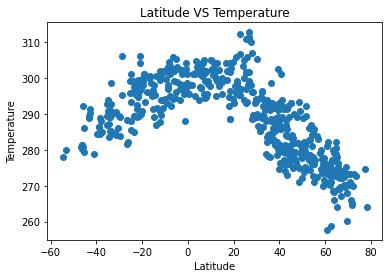

In [18]:
#Latitude vs. Temperature Plot
x_value = clean_city_data['LAT']
y_value = clean_city_data['Temp']
plt.scatter(x_value,y_value)
plt.title('Latitude VS Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

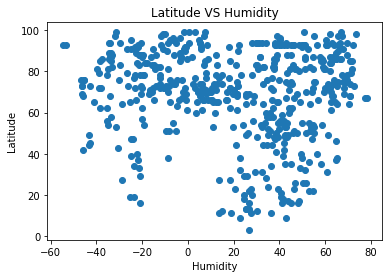

In [17]:
#Latitude vs. Humidity Plot
x_value = clean_city_data['LAT']
y_value = clean_city_data['Humidity']
plt.scatter(x_value,y_value)
plt.title('Latitude VS Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

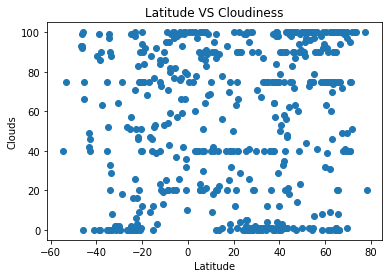

In [19]:
#Latitude vs. Cloudiness Plot
x_value = clean_city_data['LAT']
y_value = clean_city_data['Clouds']
plt.scatter(x_value,y_value)
plt.title('Latitude VS Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.show()

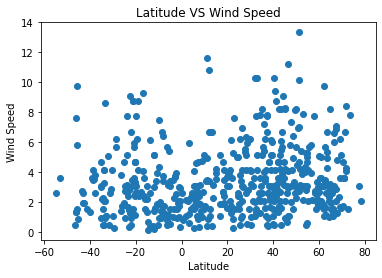

In [20]:
#Latitude vs. Wind Speed Plot
x_value = clean_city_data['LAT']
y_value = clean_city_data['Wind Speed']
plt.scatter(x_value,y_value)
plt.title('Latitude VS Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

In [22]:
northern_data = clean_city_data[clean_city_data['LAT'] >= 0]


In [34]:
southern_data = clean_city_data[clean_city_data['LAT'] < 0]


R squared: 0.7628678695854856


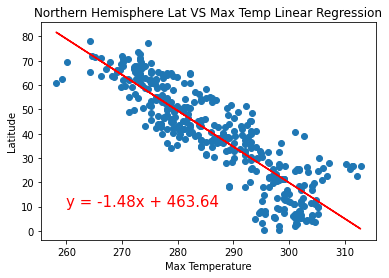

In [38]:
#Linear Regression
#  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_data['Temp Max'].astype('float')
y_values = northern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(260,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Northern Hemisphere Lat VS Max Temp Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.49024393171033953


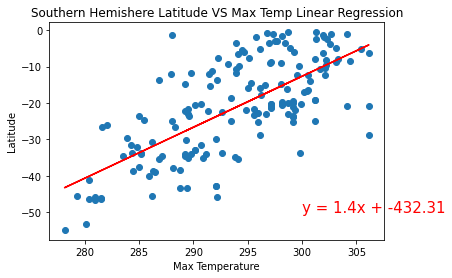

In [37]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_data['Temp Max'].astype('float')
y_values = southern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(300,-50),fontsize=15,color="red")

# Label plot
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.title('Southern Hemishere Latitude VS Max Temp Linear Regression')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()



R squared: 0.013213520860262147


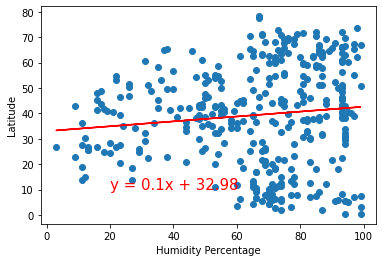

In [29]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_data['Humidity'].astype('float')
y_values = northern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity Percentage')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.018551454600815826


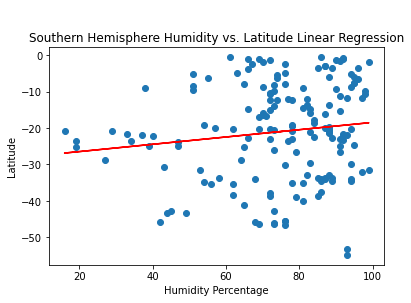

In [39]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_data['Humidity'].astype('float')
y_values = southern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity Percentage')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Humidity vs. Latitude Linear Regression')
# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.01884227336491236


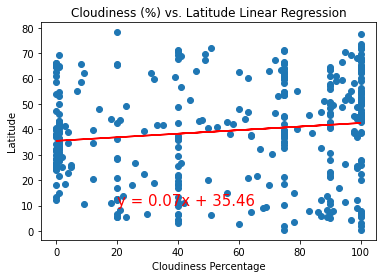

In [31]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_data['Clouds'].astype('float')
y_values = northern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness Percentage')
plt.ylabel('Latitude')
plt.title('Cloudiness (%) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.029872291324069815


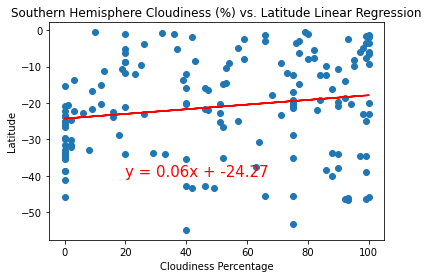

In [42]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_data['Clouds'].astype('float')
y_values = southern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-40),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness Percentage')
plt.ylabel('Latitude')
plt.title('Southern Hemisphere Cloudiness (%) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.01563242814985607


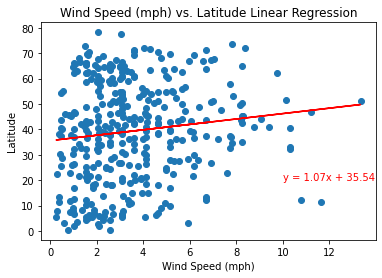

In [46]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_data['Wind Speed'].astype('float')
y_values = northern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=10,color="red")

# Label plot
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.00647768050003029


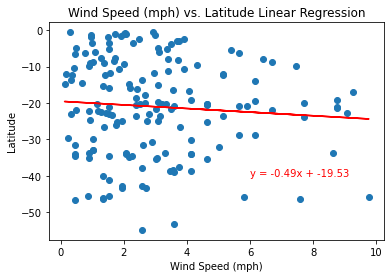

In [45]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_data['Wind Speed'].astype('float')
y_values = southern_data['LAT'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-40),fontsize=10,color="red")

# Label plot
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Wind Speed (mph) vs. Latitude Linear Regression')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()